In [217]:
import pandas as pd
import numpy as np

In [218]:
pd.set_option('display.float_format',lambda x: '{: .2f}'.format(x)) #decimal value upto 2 places
np.set_printoptions(suppress=True) #removes scientific notation
pd.set_option("display.max_columns",None) #scroll bar
pd.set_option("display.width",2000) # scroll bar

In [219]:
df = pd.read_csv(r'C:\Users\Shiwan\OneDrive\Desktop\vscode_X_jupyter_notebook\enhanced_disease_dataset.csv')
df.shape

(10000, 18)

In [220]:
df.duplicated().sum()

0

In [221]:
df.isna().sum()

Disease          0
Symptom_1        0
Symptom_2        0
Symptom_3        0
Symptom_4      617
Symptom_5     1293
Symptom_6     1959
Symptom_7     2607
Symptom_8     3323
Symptom_9     3980
Symptom_10    4617
Symptom_11    5327
Symptom_12    6020
Symptom_13    6637
Symptom_14    7308
Symptom_15    7953
Symptom_16    8616
Symptom_17    9287
dtype: int64

In [222]:
df.Disease.value_counts()

Disease
Fungal Infection                        200
Acne Vulgaris                           200
Pneumonia                               200
Hemorrhoids                             200
Myocardial Infarction                   200
Varicose Veins                          200
Hypothyroidism                          200
Hyperthyroidism                         200
Hypoglycemia                            200
Osteoarthritis                          200
Rheumatoid Arthritis                    200
Benign Paroxysmal Positional Vertigo    200
Urinary Tract Infection                 200
Allergic Rhinitis                       200
Psoriasis                               200
Impetigo                                200
Lung Cancer                             200
Breast Cancer                           200
Colorectal Cancer                       200
Prostate Cancer                         200
Stomach Cancer                          200
Coronary Artery Disease                 200
COPD                    

In [223]:
df.columns = df.columns.str.lower()


In [224]:
df = df.apply(lambda col: col.map(lambda x: x.lower() if isinstance(x, str) else x))


In [225]:
df.head()

,disease,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,symptom_6,symptom_7,symptom_8,symptom_9,symptom_10,symptom_11,symptom_12,symptom_13,symptom_14,symptom_15,symptom_16,symptom_17
0,fungal infection,dischromic_patches,nail_pitting,dysphagia,heart_palpitations,runny_nose,weakness,itching,skin_rash,fatigue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,fungal infection,cold_intolerance,skin_rash,breathlessness,blisters,itching,visible_veins,scarring,joint_pain,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,fungal infection,jaundice,coughing_blood,vomiting,nausea,itching,swollen_lymph_nodes,nodal_eruptions,skin_rash,cloudy_urine,disorientation,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,fungal infection,mood_swings,early_satiety,stiffness,numbness,nodal_eruptions,dysphagia,itching,skin_rash,joint_pain,breathlessness,dischromic_patches,bone_pain,NaN,NaN,NaN,NaN,NaN
4,fungal infection,high_blood_pressure,dysphagia,skin_rash,nausea,dischromic_patches,seizures,polydipsia,early_satiety,vomiting_blood,iron_deficiency_anemia,changes_in_urination,itching,balance_loss,sweating,NaN,NaN,NaN


In [226]:
(df.value_counts())

disease                  symptom_1            symptom_2         symptom_3        symptom_4                        symptom_5                symptom_6                symptom_7         symptom_8           symptom_9            symptom_10            symptom_11            symptom_12    symptom_13               symptom_14           symptom_15            symptom_16          symptom_17        
acne vulgaris            arm_pain             visual_aura       weight_loss      frequent_respiratory_infections  swelling                 heartburn                pimples           dysphagia           bone_pain            loss_of_appetite      dischromic_patches    oiliness      burning_urination        scarring             blood_in_stool        visible_veins       urinary_difficulty    1
jaundice                 wheezing             jaundice          visible_veins    dark_urine                       fatigue                  changes_in_bowel_habits  skin_dimpling     itching             night_sweats     

In [227]:
symptom_cols = [col for col in df.columns if col.startswith('symptom_')]

df['combined_symptoms'] = df[symptom_cols].apply(
    lambda row: ' '.join(sym.strip() for sym in row if pd.notnull(sym)),
    axis=1
)

In [228]:
df.drop([f'symptom_{i}' for i in range(1, 18)], axis=1, inplace=True)

In [229]:
(df['combined_symptoms'][1])

'cold_intolerance skin_rash breathlessness blisters itching visible_veins scarring joint_pain dischromic_patches'

In [230]:
df['symptom_count'] = df['combined_symptoms'].apply(lambda x: len(str(x).split()))


In [231]:
df[['disease','symptom_count']]

,disease,symptom_count
0,fungal infection,9
1,fungal infection,9
2,fungal infection,10
3,fungal infection,12
4,fungal infection,14
...,...,...
9995,alzheimers disease,12
9996,alzheimers disease,5
9997,alzheimers disease,8
9998,alzheimers disease,4


In [232]:
df = df[df['disease']!='hepatitis e']
df = df[df['disease']!='hepatitis c'] 
df = df[df['disease']!='hepatitis d']

C:\Users\Shiwan\AppData\Local\Temp\ipykernel_15936\4268095567.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_47.values, y=top_47.index, palette="viridis")


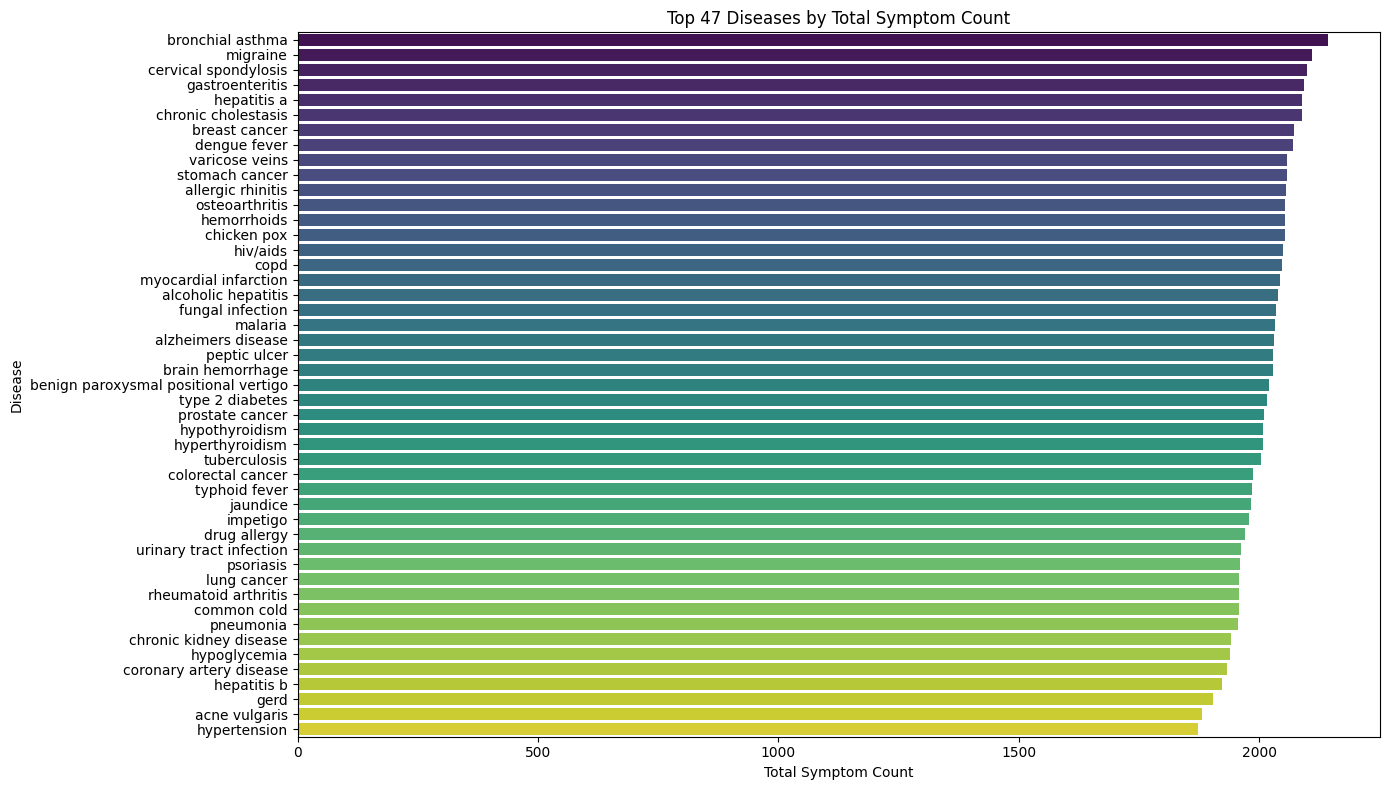

In [233]:
import matplotlib.pyplot as plt
import seaborn as sns

disease_symptom_sum = df.groupby('disease')['symptom_count'].sum()

top_47 = disease_symptom_sum.sort_values(ascending=False).head(50)

plt.figure(figsize=(14, 8))
sns.barplot(x=top_47.values, y=top_47.index, palette="viridis")

plt.xlabel("Total Symptom Count")
plt.ylabel("Disease")
plt.title("Top 47 Diseases by Total Symptom Count")
plt.tight_layout()
plt.show()

In [234]:
df.head()

,disease,combined_symptoms,symptom_count
0,fungal infection,dischromic_patches nail_pitting dysphagia hear...,9
1,fungal infection,cold_intolerance skin_rash breathlessness blis...,9
2,fungal infection,jaundice coughing_blood vomiting nausea itchin...,10
3,fungal infection,mood_swings early_satiety stiffness numbness n...,12
4,fungal infection,high_blood_pressure dysphagia skin_rash nausea...,14


In [235]:

age_group_map = {
    'acne vulgaris': 1,
    'alcoholic hepatitis': 3,
    'allergic rhinitis': 0,
    'alzheimers disease': 4,
    'benign paroxysmal positional vertigo': 4,
    'brain hemorrhage': 4,
    'breast cancer': 4,
    'bronchial asthma': 0,
    'cervical spondylosis': 3,
    'chicken pox': 0,
    'chronic cholestasis': 3,
    'chronic kidney disease': 4,
    'colorectal cancer': 4,
    'common cold': 0,
    'copd': 4,
    'coronary artery disease': 4,
    'dengue fever': 0,
    'drug allergy': 0,
    'fungal infection': 0,
    'gastroenteritis': 0,
    'gerd': 3,
    'hemorrhoids': 3,
    'hepatitis a': 0,
    'hepatitis b': 2,
    'hiv/aids': 2,
    'hypertension': 3,
    'hyperthyroidism': 2,
    'hypoglycemia': 0,
    'hypothyroidism': 2,
    'impetigo': 0,
    'jaundice': 0,
    'lung cancer': 4,
    'malaria': 0,
    'migraine': 2,
    'myocardial infarction': 4,
    'osteoarthritis': 4,
    'peptic ulcer': 2,
    'pneumonia': 0,
    'prostate cancer': 4,
    'psoriasis': 2,
    'rheumatoid arthritis': 3,
    'stomach cancer': 4,
    'tuberculosis': 2,
    'type 2 diabetes': 3,
    'typhoid fever': 0,
    'urinary tract infection': 2,
    'varicose veins': 3
}

df['age_group'] = df['disease'].map(age_group_map)

age_group_labels = {
    0: "Children (0–14)",
    1: "Youth (15–29)",
    2: "Young Adults (30–44)",
    3: "Middle-aged Adults (45–59)",
    4: "Older Adults (60+)"
}

In [236]:
sex_map = {
    'acne vulgaris': 'both',
    'alcoholic hepatitis': 'male',
    'allergic rhinitis': 'both',
    'alzheimers disease': 'female',
    'benign paroxysmal positional vertigo': 'female',
    'brain hemorrhage': 'male',
    'breast cancer': 'female',
    'bronchial asthma': 'female',
    'cervical spondylosis': 'both',
    'chicken pox': 'both',
    'chronic cholestasis': 'female',
    'chronic kidney disease': 'male',
    'colorectal cancer': 'both',
    'common cold': 'both',
    'copd': 'male',
    'coronary artery disease': 'male',
    'dengue fever': 'both',
    'drug allergy': 'female',
    'fungal infection': 'both',
    'gastroenteritis': 'both',
    'gerd': 'both',
    'hemorrhoids': 'both',
    'hepatitis a': 'both',
    'hepatitis b': 'male',
    'hiv/aids': 'male',
    'hypertension': 'both',
    'hyperthyroidism': 'female',
    'hypoglycemia': 'both',
    'hypothyroidism': 'female',
    'impetigo': 'both',
    'jaundice': 'both',
    'lung cancer': 'male',
    'malaria': 'both',
    'migraine': 'female',
    'myocardial infarction': 'male',
    'osteoarthritis': 'female',
    'peptic ulcer': 'male',
    'pneumonia': 'both',
    'prostate cancer': 'male',
    'psoriasis': 'both',
    'rheumatoid arthritis': 'female',
    'stomach cancer': 'male',
    'tuberculosis': 'male',
    'type 2 diabetes': 'both',
    'typhoid fever': 'both',
    'urinary tract infection': 'female',
    'varicose veins': 'female'
}

df['sex'] = df['disease'].map(sex_map)

df.head()

,disease,combined_symptoms,symptom_count,age_group,sex
0,fungal infection,dischromic_patches nail_pitting dysphagia hear...,9,0,both
1,fungal infection,cold_intolerance skin_rash breathlessness blis...,9,0,both
2,fungal infection,jaundice coughing_blood vomiting nausea itchin...,10,0,both
3,fungal infection,mood_swings early_satiety stiffness numbness n...,12,0,both
4,fungal infection,high_blood_pressure dysphagia skin_rash nausea...,14,0,both


In [237]:
df=pd.get_dummies(df,columns=['sex'],drop_first=True,dtype=int)

In [238]:
df.head()

,disease,combined_symptoms,symptom_count,age_group,sex_female,sex_male
0,fungal infection,dischromic_patches nail_pitting dysphagia hear...,9,0,0,0
1,fungal infection,cold_intolerance skin_rash breathlessness blis...,9,0,0,0
2,fungal infection,jaundice coughing_blood vomiting nausea itchin...,10,0,0,0
3,fungal infection,mood_swings early_satiety stiffness numbness n...,12,0,0,0
4,fungal infection,high_blood_pressure dysphagia skin_rash nausea...,14,0,0,0


In [239]:
# Calculate mean symptom count per age group
age_symptom_means = df.groupby('age_group')['symptom_count'].mean().to_dict()

# Create interaction: "Is this patient's symptom count higher than average for their age?"
df['symptom_count_vs_age'] = df.apply(
    lambda row: row['symptom_count'] / age_symptom_means[row['age_group']], 
    axis=1
)

In [240]:
# Create age-specific symptom counts
for age in [0, 1, 2, 3, 4]:  # Your age group codes
    df[f'symptoms_age{age}'] = (df['age_group'] == age) * df['symptom_count']

In [241]:
df['pediatric_fever'] = ((df['age_group'] == 0) & df['combined_symptoms'].str.contains('fever')).astype(int)

In [242]:
chronic_symptoms = ['fatigue', 'joint_pain', 'hypertension']
df['elderly_chronic'] = ((df['age_group'] == 4) & df['combined_symptoms'].str.contains('|'.join(chronic_symptoms))).astype(int)

In [243]:
# Create clinically meaningful interactions
df['age_symptom_count'] = df['age_group'] * df['symptom_count']

df['male_elderly'] = ((df['sex_male'] == 1) & (df['age_group'] == 4)).astype(int)


In [244]:
df.sample(65)

,disease,combined_symptoms,symptom_count,age_group,sex_female,sex_male,symptom_count_vs_age,symptoms_age0,symptoms_age1,symptoms_age2,symptoms_age3,symptoms_age4,pediatric_fever,elderly_chronic,age_symptom_count,male_elderly
4912,alcoholic hepatitis,wheezing vomiting nodal_eruptions memory_loss ...,13,3,0,1,1.29,0,0,0,13,0,0,0,39,0
8588,breast cancer,breast_lump creaking_joints balance_loss verti...,8,4,1,0,0.79,0,0,0,0,8,0,0,32,0
7684,urinary tract infection,fever frequent_urination burning_urination clo...,4,2,1,0,0.40,0,0,4,0,0,0,0,8,0
8943,prostate cancer,dehydration blood_in_semen weight_loss polydip...,10,4,0,1,0.99,0,0,0,0,10,0,0,40,1
3190,malaria,high_blood_pressure vomiting early_satiety chi...,12,0,0,0,1.19,12,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6199,varicose veins,leg_pain visible_veins shortness_of_breath con...,11,3,1,0,1.09,0,0,0,11,0,0,0,33,0
855,drug allergy,swelling hives itching disorientation wheezing...,16,0,1,0,1.58,16,0,0,0,0,0,0,0,0
212,allergic rhinitis,fever itchy_eyes memory_loss changes_in_bowel_...,11,0,0,0,1.09,11,0,0,0,0,1,0,0,0
5574,pneumonia,arm_pain nodal_eruptions cough blackheads feve...,10,0,0,0,0.99,10,0,0,0,0,1,0,0,0


In [245]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features= 15000)

In [246]:
df.columns

Index(['disease', 'combined_symptoms', 'symptom_count', 'age_group', 'sex_female', 'sex_male', 'symptom_count_vs_age', 'symptoms_age0', 'symptoms_age1', 'symptoms_age2', 'symptoms_age3', 'symptoms_age4', 'pediatric_fever', 'elderly_chronic', 'age_symptom_count', 'male_elderly'], dtype='object')

In [247]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(
    df, test_size=0.25, stratify=df['disease'], random_state=42
)

In [248]:
X_train = df_train[['combined_symptoms','symptom_count','age_group','sex_female','sex_male','symptom_count_vs_age','symptoms_age0', 'symptoms_age1', 'symptoms_age2', 'symptoms_age3', 'symptoms_age4', 'pediatric_fever', 'elderly_chronic', 'age_symptom_count', 'male_elderly']]
X_test = df_test[['combined_symptoms','symptom_count','age_group','sex_female','sex_male','symptom_count_vs_age','symptoms_age0', 'symptoms_age1', 'symptoms_age2', 'symptoms_age3', 'symptoms_age4', 'pediatric_fever', 'elderly_chronic', 'age_symptom_count', 'male_elderly']]

y_train = df_train['disease']
y_test = df_test['disease']

In [249]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(df_train['disease'])
y_test = le.transform(df_test['disease'])

In [250]:

X_train_tfidf = tfidf.fit_transform(X_train['combined_symptoms']).toarray()
X_test_tfidf = tfidf.transform(X_test['combined_symptoms']).toarray()

feature_cols = ['symptom_count', 'age_group', 'sex_male', 'sex_female']

X_train_extra = np.hstack([X_train[col].values.reshape(-1, 1) for col in feature_cols])
X_test_extra = np.hstack([X_test[col].values.reshape(-1, 1) for col in feature_cols])

X_train_final = np.hstack([X_train_tfidf, X_train_extra])
X_test_final = np.hstack([X_test_tfidf, X_test_extra])

In [251]:
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, classification_report

mnb = MultinomialNB()

mnb.fit(X_train_final, y_train)

y_pred_mnb = mnb.predict(X_test_final)

print("Accuracy:", accuracy_score(y_test, y_pred_mnb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_mnb))


Accuracy: 0.936595744680851

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.72      0.88      0.79        50
           2       0.87      0.94      0.90        50
           3       1.00      1.00      1.00        50
           4       1.00      1.00      1.00        50
           5       0.94      0.98      0.96        50
           6       1.00      0.98      0.99        50
           7       0.98      0.98      0.98        50
           8       0.98      1.00      0.99        50
           9       0.77      0.82      0.80        50
          10       0.98      0.96      0.97        50
          11       0.93      0.86      0.90        50
          12       1.00      0.96      0.98        50
          13       0.96      0.88      0.92        50
          14       0.96      0.98      0.97        50
          15       0.92      0.88      0.90        50
          16       0.85     

In [252]:
bnb = BernoulliNB(
  alpha= 8.47,
  binarize= 0.0177,
  fit_prior= True
)

bnb.fit(X_train_final, y_train)

y_pred_bnb = bnb.predict(X_test_final)

print("Accuracy:", accuracy_score(y_test, y_pred_bnb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_bnb))

Accuracy: 0.9446808510638298

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        50
           1       0.74      0.86      0.80        50
           2       0.92      0.92      0.92        50
           3       1.00      1.00      1.00        50
           4       0.98      0.98      0.98        50
           5       0.92      0.98      0.95        50
           6       0.98      0.98      0.98        50
           7       1.00      0.98      0.99        50
           8       0.96      0.98      0.97        50
           9       0.89      0.84      0.87        50
          10       0.98      0.92      0.95        50
          11       0.93      0.86      0.90        50
          12       1.00      0.98      0.99        50
          13       0.94      0.94      0.94        50
          14       0.98      0.98      0.98        50
          15       0.87      0.94      0.90        50
          16       0.92    

In [253]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Initialize and train XGBoost (with sensible defaults)
xgb_model = XGBClassifier(
   objective='multi:softmax',  # For multiclass classification
    num_class=len(np.unique(y_train)),  # Auto-detect number of diseases
    eval_metric='mlogloss',     # Multiclass logloss (better than accuracy)
    use_label_encoder=False,    # Avoids warning
    random_state=42
)

# 2. Train (just like your BNB example)
xgb_model.fit(X_train_final, y_train)

# 3. Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test_final)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nXGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))


c:\Users\Shiwan\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:22:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


KeyboardInterrupt: 